In [1]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt('ftlog96.txt')#, delimiter=',', skiprows=1)

t=data.T[0]
q0=data.T[1]
q1=data.T[2]
q2=data.T[3]
q3=data.T[4]
dp=data.T[5]
dq=data.T[6]
dr=data.T[7]
Wp=data.T[8]
Wq=data.T[9]
Wr=data.T[10]
Ax=data.T[11]
Ay=data.T[12]
Az=data.T[13]
Mx=data.T[14]
My=data.T[15]
Mz=data.T[16]

p_ref=data.T[17]
q_ref=data.T[18]
r_ref=data.T[19]

phi=data.T[20]
theta=data.T[21]
psi=data.T[22]

phi_ref=data.T[23]
theta_ref=data.T[24]
psi_ref=data.T[25]

Pcom=data.T[26]
Qcom=data.T[27]
Rcom=data.T[28]

pd=data.T[29]
qd=data.T[30]
rd=data.T[31]
#MN=data.T[29]
#ME=data.T[30]
#MD=data.T[31]


phid=data.T[32]
thetad=data.T[33]



mag=np.sqrt(q0**2 + q1**2 + q2**2 + q3**2)
#q0=q0/mag
#q1=q1/mag
#q2=q2/mag
#q3=q3/mag


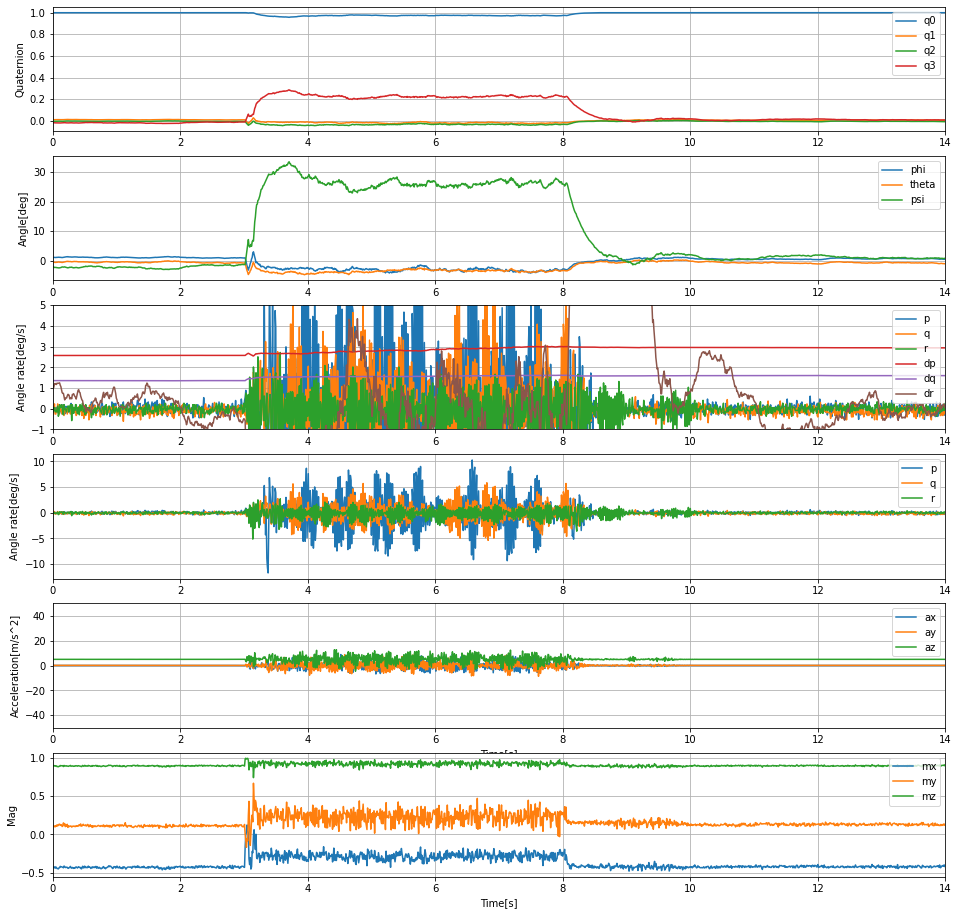

In [2]:
tmin=0
tmax=14#max(t)
ax1=plt.figure(figsize=(16,16))
ax1.add_subplot(611)
plt.plot(t,q0,label='q0')
plt.plot(t,q1,label='q1')
plt.plot(t,q2,label='q2')
plt.plot(t,q3,label='q3')
plt.legend(loc='upper right')
#plt.xlim([0,max(t)])
plt.ylabel('Quaternion')
plt.xlim([tmin,tmax])

plt.grid()
#plt.show()

e11=q0**2+q1**2-q2**2-q3**2
e12=2*(q1*q2+q0*q3)
e13=2*(q1*q3-q0*q2)
e23=2*(q2*q3+q0*q1)
e33=q0**2-q1**2-q2**2+q3**2
phi=np.arctan2(e23,e33)
theta=np.arctan2(-e13,np.sqrt(e23**2+e33**2))
psi=np.arctan2(e12,e11)

ax1.add_subplot(612)
#plt.figure(figsize=(16,4))
plt.plot(t,phi*180/np.pi,label='phi')
plt.plot(t,theta*180/np.pi,label='theta')
plt.plot(t,psi*180/np.pi,label='psi')
plt.legend()
plt.ylabel('Angle[deg]')
#plt.xlim([0,max(t)])
plt.xlim([tmin,tmax])
#plt.xlim([10,10.1])
#plt.yticks([-180,-135,-90,-45,0,45,90,135,180])
#plt.ylim([-50,50])
plt.grid()



ax1.add_subplot(613)
#plt.figure(figsize=(16,4))
plt.plot(t,Wp*180/np.pi,label='p')
plt.plot(t,Wq*180/np.pi,label='q')
plt.plot(t,Wr*180/np.pi,label='r')

plt.plot(t,dp*180/np.pi,label='dp')
plt.plot(t,dq*180/np.pi,label='dq')
plt.plot(t,dr*180/np.pi,label='dr')
plt.legend()
plt.ylabel('Angle rate[deg/s]')
#plt.xlim([0,max(t)])
plt.xlim([tmin,tmax])
#plt.xlim([10,10.1])
#plt.yticks([-180,-135,-90,-45,0,45,90,135,180])
plt.ylim([-1,5])
plt.grid()

ax1.add_subplot(614)
#plt.figure(figsize=(16,4))
plt.plot(t,Wp*180/np.pi,label='p')
plt.plot(t,Wq*180/np.pi,label='q')
plt.plot(t,Wr*180/np.pi,label='r')
plt.legend()
plt.ylabel('Angle rate[deg/s]')
#plt.xlim([0,max(t)])
plt.xlim([tmin,tmax])
#plt.xlim([10,10.1])
#plt.yticks([-180,-135,-90,-45,0,45,90,135,180])
#plt.ylim([-90,90])
plt.grid()


ax1.add_subplot(615)
#plt.figure(figsize=(16,4))
plt.plot(t,Ax,label='ax')
plt.plot(t,Ay,label='ay')
plt.plot(t,Az,label='az')
plt.legend()
#plt.xlim([0,max(t)])
plt.xlim([tmin,tmax])
#plt.xlim([10,10.1])
#plt.yticks([-180,-135,-90,-45,0,45,90,135,180])
plt.ylim([-50,50])
plt.ylabel('Acceleration[m/s^2]')
plt.grid()
plt.xlabel('Time[s]')

ax1.add_subplot(616)
#plt.figure(figsize=(16,4))
plt.plot(t,Mx,label='mx')
plt.plot(t,My,label='my')
plt.plot(t,Mz,label='mz')
#plt.plot(t,MN,label='MN')
#plt.plot(t,ME,label='ME')
#plt.plot(t,MD,label='MD')

plt.legend()
#plt.xlim([0,max(t)])
plt.xlim([tmin,tmax])
#plt.xlim([10,10.1])
#plt.yticks([-180,-135,-90,-45,0,45,90,135,180])
#plt.ylim([-50,50])
plt.ylabel('Mag')
plt.grid()
plt.xlabel('Time[s]')

plt.show()


In [ ]:
#データから３Dアニメの素作成

frame=24
dt=0.01
N=len(q0)
i=0
index=0
iframe=0.0
while(i<N):
    fig = plt.figure(figsize=(12,12))
    axis = fig.add_subplot(111, projection='3d')
    axis.set_box_aspect((1,1,1))

    # X,Y,Z軸にラベルを設定
    axis.set_xlabel("X")
    axis.set_ylabel("Y")
    axis.set_zlabel("Z")
    #ax.set_xlim([-500,500])
    #ax.set_ylim([-400,600])
    #ax.set_zlim([-600,400])
    axis.set_xlim([-1.1,1.1])
    axis.set_ylim([-1.1,1.1])
    axis.set_zlim([-1.1,1.1])
    axis.view_init(elev=200, azim=230)
    plt.grid()
    
    #mag=np.sqrt(q0[i]**2+q1[i]**2+q2[i]**2+q3[i]**2)
    #q0[i]=q0[i]/mag
    #q1[i]=q1[i]/mag
    #q2[i]=q2[i]/mag
    #q3[i]=q3[i]/mag
    
    
    a11=q0[i]**2+q1[i]**2-q2[i]**2-q3[i]**2
    a12=2*(q1[i]*q2[i]+q0[i]*q3[i])
    a13=2*(q1[i]*q3[i]-q0[i]*q2[i])
   
    a21=2*(q1[i]*q2[i]-q0[i]*q3[i])
    a22=q0[i]**2-q1[i]**2+q2[i]**2-q3[i]**2
    a23=2*(q2[i]*q3[i]+q0[i]*q1[i])
    
    a31=2*(q1[i]*q3[i]+q0[i]*q2[i])
    a32=2*(q2[i]*q3[i]-q0[i]*q1[i])
    a33=q0[i]**2-q1[i]**2-q2[i]**2+q3[i]**2

    mag1=np.sqrt(a11**2+a12**2+a13**2)
    mag2=np.sqrt(a21**2+a22**2+a23**2)
    mag3=np.sqrt(a31**2+a32**2+a33**2)


    axis.plot([0,a11/mag1],[0,a12/mag1],[0,a13/mag1],lw=3,c='r')
    axis.plot([0,a21/mag2],[0,a22/mag2],[0,a23/mag2],lw=3,c='g')
    axis.plot([0,a31/mag3],[0,a32/mag3],[0,a33/mag3],lw=3,c='b' )

    #plt.show()
    plt.savefig('quat/quat{:04d}'.format(index), facecolor='w')
    plt.close()
    index=index+1
    iframe=iframe+(1/dt)/frame
    i=int(iframe)

In [ ]:
#ffmpegを使い　MP4ファイル生成
import os
import ffmpeg as fp

filename='ftlog84.mp4'

try:
    os.remove(filename)
except:
    print('Not found {:s}'.format(filename))
stream = fp.input('quat/quat%04d.png',r=24)
stream = fp.output(stream, filename,\
                   r=24,\
                   vcodec='libx264',\
                   pix_fmt='yuv420p',\
                   loglevel='quiet')
r=fp.run(stream)
print('Finish to create MP4 file. ')

In [ ]:
from IPython.display import Video
Video(filename, width=640)

In [ ]:
tmin=0
tmax=14.5
ax1=plt.figure(figsize=(16,9))

ax1.add_subplot(321)
plt.plot(t,Mx,label='mx')
plt.legend()
plt.ylabel('Mag x')
plt.xlim([tmin,tmax])
plt.ylim([-0.5,-0.1])
plt.grid()

ax1.add_subplot(323)
plt.plot(t,My,label='my')
plt.legend()
plt.ylabel('Mag y')
plt.xlim([tmin,tmax])
plt.ylim([-0.1,0.6])
plt.grid()

ax1.add_subplot(325)
plt.plot(t,Mz,label='mz')
plt.legend()
plt.ylabel('Mag z')
plt.xlim([tmin,tmax])
plt.ylim([0.85,1.0])
plt.grid()

ax1.add_subplot(322)
plt.plot(t,phi,label='phi')
#plt.plot(t,phi_ref,label='phi_ref')
plt.legend()
plt.ylabel('Roll angle[rad]')
plt.xlim([tmin,tmax])
#plt.ylim([-0.01,0.04])
plt.grid()

ax1.add_subplot(324)
plt.plot(t,theta,label='theta')
#plt.plot(t,theta_ref,label='theta_ref')
plt.legend()
plt.ylabel('Pitch angle[rad]')
plt.xlim([tmin,tmax])
#plt.ylim([-0.15,0.05])
plt.grid()

ax1.add_subplot(326)
plt.plot(t,psi,label='psi')
plt.legend()
plt.ylabel('Yaw angle[rad]')
plt.xlim([tmin,tmax])
#plt.ylim([-0.11,0.05])
plt.grid()
plt.show()


In [ ]:
print(Wp[400:600].var())
print(Wq[400:600].var())
print(Wr[400:600].var())

In [ ]:
print(Ax[400:600].var())
print(Ay[400:600].var())
print(Az[400:600].var())

In [ ]:
print(Mx[400:600].var())
print(My[400:600].var())
print(Mz[400:600].var())